# Regresión lineal y polinómica: homework



------------------------------------------------------


### Data Science and Machine Learning

#### Febrero 2023

**Aurora Cobo Aguilera**

**The Valley**

------------------------------------------------------


# 1. Análisis de la importancia de las características con modelos de regresión lineal

Cuando usamos modelos lineales de la forma:

$$f(\mathbf{x}) =  w_0 + w_1 x_1 + w_2 x_2 + \ldots + w_D x_D, $$

cada variable de entrada o característica tiene asociado un peso. ¿El valor de este peso nos indica lo relevante o importante que es cada característica para estimar nuestro *target*? ¿Podríamos usar estos pesos para hacer selección de características?

El objetivo de esta primera parte de la práctica es dar respuesta a estas preguntas y para ello vamos a generar un conjunto de datos sintéticos sobre dos escenarios diferentes. De este modo, sabremos a priori qué variables son más relevantes y así podremos analizar los pesos del regresor para ver si su magnitud es acorde con la importancia de las variables.

## 1.1. Escenario 1: Variables independientes

Para este primer escenario la siguiente celda de código genera un conjunto de datos con 20 variables independientes de las que algunas son relevantes o están relacionas con la variable objetivo mientras que otras son variables ruidosas que no tienen ninguna influencia en la salida. 

Comience analizando el proceso de generación de datos y luego complete el siguiente ejercicio:

In [ ]:
import numpy as np

In [ ]:
np.random.seed(seed=50) # Cambia aquí la semilla aleatoria

N = 100
D = 20

# Genera muestras aleatorias de una distribución Gaussiana
X = np.random.randn(N,D) # Media cero y varianza 1

# Crea una matriz mezcladora
w_relevant = np.array([10, 5, 2, 1, 0.5])
w_real = np.concatenate((w_relevant, np.zeros((D-w_relevant.shape[0],)))) # Las últimas variables no tendrán influencia sobre la salida


# Obtén las salidas (targets) como una combinación lineal más ruido
noise = 0.5 * np.random.randn(N) 
Y = X @  w_real + noise  # sumarle un ruido


print(X.shape)
print(Y.shape)

(100, 20)
(100,)


> **Ejercicio**: Entrene un modelo *Ridge Regression* y un modelo *Lasso*, validando sus parámetros de regularización, y analize los pesos del regresor para cada caso. Tienes el código necesario para el modelo Ridge, repite algo similar para Lasso. Busca el modelo en el librería de sklearn si hace falta.


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [ ]:
# RIDGE
RidgeReg = Ridge() 

param_grid = {'alpha': np.logspace(-6, 6, 13)}

RidgeReg_grid = GridSearchCV(RidgeReg, param_grid, cv=10, scoring='neg_mean_squared_error')
RidgeReg_grid.fit(X, Y) 

print(RidgeReg_grid.best_params_)

w_star_RR = RidgeReg_grid.best_estimator_.coef_
print(w_star_RR)

{'alpha': 1e-06}
[ 9.99946959e+00  4.99385994e+00  2.09711793e+00  1.04141301e+00
  6.59401184e-01  2.39460018e-02  1.67265404e-02 -1.51216801e-02
  4.53815354e-03 -5.89513492e-02  9.64894012e-02 -4.19115920e-02
 -1.15513371e-01  2.65243351e-02 -6.34867809e-02  5.99022532e-02
 -3.94894601e-02  8.96083905e-02 -3.24214055e-03  4.11749880e-02]


In [ ]:
# LASSO
from sklearn.linear_model import Lasso
#<SOL>
LassoReg = Lasso() 

param_grid = {'alpha': np.logspace(-6, 6, 13)}

LassoReg_grid = GridSearchCV(LassoReg, param_grid, cv=10)
LassoReg_grid.fit(X, Y) 

print(LassoReg_grid.best_params_)

w_star_Lasso = LassoReg_grid.best_estimator_.coef_
print(w_star_Lasso)
#</SOL>

{'alpha': 0.1}
[ 9.83535311  4.91393449  1.94330521  0.97344903  0.52452117  0.
 -0.         -0.          0.         -0.          0.         -0.
 -0.01868972  0.          0.          0.         -0.          0.
  0.          0.        ]


>**Ejercicio**: Añade las gráficas con los w reales y los de las predicciones de Ridge y de Lasso. Para ellos utilizaremos la función *stem* de *matplotlib*. Puedes buscar sobre ella, pero básicamente en una manera de representar secuencias de valores, también conocidos como valores discretos.

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.stem.html


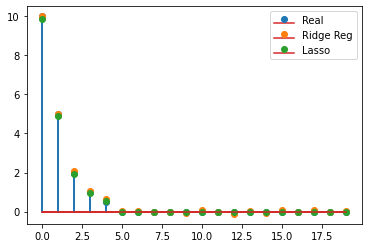

In [ ]:
#<SOL>
import matplotlib.pyplot as plt

plt.figure()
plt.stem(w_real, markerfmt='o', label='Real', use_line_collection=True)
plt.stem(w_star_RR, markerfmt='o', label='Ridge Reg', use_line_collection=True)
plt.stem(w_star_Lasso, markerfmt='o', label='Lasso', use_line_collection=True)
plt.legend()
#</SOL>

>**Ejercicio**: A la vista de la salida, analice los resultados tratando de contestar a estas preguntas:
* ¿Los pesos, w,  de los modelos aprendidos nos indican la relevancia de cada variable? Sí
* ¿Podríamos usarlos para hacer selección de características? Sí
* Si cambiamos la semilla en el generador de datos, ¿los resultados obtenidos son similares? Sí ¿Puede ayudarnos el entrenar diferentes modelos (con diferentes conjuntos de datos generados bajo la misma distribución) para mejorar la selección de características?

## 1.2. Escenario 2: Variables redundantes

Para este segundo escenario vamos a modificar el generador de datos anterior para que en nuestro conjunto de datos haya variables redundantes entre sí. En concreto, vamos a generar 5 réplicas de las variables 1 y 5, y a añadirlas al final de nuestro conjunto de datos. 

Al igual que antes, comience analizando el proceso de generación de datos y luego complete el ejercicio.

In [ ]:
np.random.seed(seed=100) # Cambia aquí la semilla aleatoria

N = 100
D = 20

# Genera muestras aleatorias de una distribución Gaussiana
X = np.random.randn(N,D) 

# Crea una matriz mezcladora
w_relevant = np.array([10, 5, 2, 1, 0.5])
w_real = np.concatenate((w_relevant, np.zeros((D-w_relevant.shape[0],)))) # Las últimas variables no tendrán influencia sobre la salida

# Obtén la salida (target) como una combinación lineal más un ruido
noise = 0.5 * np.random.randn(N) 
Y = X @  w_real + noise

# Añadimos repeticiones de algunas variables
Num_rep = 5
X_1_red = np.tile(X[:,0],(Num_rep,1)).T 
X_5_red = np.tile(X[:,4],(Num_rep,1)).T  

X = np.concatenate((X, X_1_red, X_5_red), axis =1)

w_real_all = np.concatenate((w_real, np.tile(w_real[0],Num_rep), np.tile(w_real[4],Num_rep))) 


> **Ejercicio**: Entrene nuevamente un modelo *Ridge Regression* y un modelo *Lasso*, validando sus parametros de regularización, y analize los pesos del regresor para cada caso. Vuelva a contestar ahora a las mismas preguntas del ejercicio anterior a la vez que analiza las diferencias.

In [ ]:
# Incluye aquí tu solución Ridge Regression
# <SOL>

# </SOL>

In [ ]:
# Incluye aquí tu solución LASSO
# <SOL>

# </SOL>

In [ ]:
# Incluye aquí tu solución para las gráficas
# <SOL>

# </SOL>

## 2. Diseño de modelos y evaluación de prestaciones sobre datos reales

En esta segunda parte vamos a resolver el problema de *California Housing* usando todas sus variables de entrada y usando un modelo de regresión polinómico regularizado. Para ello consideraremos un modelo *Ridge Regression* y un modelo *Lasso* y compararemos y analizaremos sus resultados. 

Para resolver este apartado tendrás que seguir los siguientes  pasos. Algunos ya están resueltos:
* 1. Carga y preprocesado de la base de datos: carga de datos, división en particiones de entrenamiento y test (40\% train y 60\% test) y normalización.



In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from warnings import filterwarnings

filterwarnings('ignore')

In [ ]:
## 1. Cargar y preprocesar el dataset

# Carga y analiza los datos
housing = fetch_california_housing()
X = housing.data
Y = housing.target
feature_names = housing.feature_names

# Genera los subconjuntos de entrenamiento y test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.6, random_state=0)

In [ ]:
print(feature_names)
print(X_train.shape)


**Ejercicio**:

2. Entrenamiento y validación del modelo de regresión con variables polinómicas. Aquí tenga en cuenta que, tanto para el modelo *Ridge Regression* como para *Lasso*, deberá validar conjuntamente el grado del polinomio y el parametro de regularización del regresor. Para hacer esta validación conjunta se recomienda definir el modelo con un **pipeline** y validar el grado del polinomio en el rango $\{1, 2, 3, 4\}$ y el parámetro de regularización en $\{10^{-6}, 10^{-4}, 0.01, 1, 100\}$. Tenga en cuenta que utilizando 8 variables de entrada, la extensión polinómica no puede utilizar un grado muy alto para evitar sobredimensionar el nuevo conjunto de datos (lo que nos podría llevar a problemas de memoria, cómputo, ...).

In [ ]:
## 2. Entrenamiento del modelo y validación de los parámetros

# Definimos el pipeline con sus pasos para cada modelo. Este código es útil para reutilizar en el futuro
PolyRidgeReg_pipeline = Pipeline(steps=[('Poly', PolynomialFeatures(include_bias=False)), ('Norm', StandardScaler()), ('Reg', Ridge(fit_intercept='True'))])
PolyLasso_pipeline = Pipeline(steps=[('Poly', PolynomialFeatures(include_bias=False)), ('Norm', StandardScaler()), ('Reg', Lasso(fit_intercept='True'))])

# Definimos los parametros a CV (cada parámetro se asocia con su paso: Poly __ degree)
param_grid = {'Poly__degree': # </SOL>, 'Reg__alpha': # </SOL>}

# Creamos el grid search y validamos el grado del polinonio con fit para cada modelo
PolyRidgeReg_grid = GridSearchCV(# </SOL>
PolyRidgeReg_grid.fit(# </SOL>

PolyLasso_grid = # </SOL>
PolyLasso_grid.fit(# </SOL>

# Vemos el parámetro seleccionado por CV
print('Result of CV in RR:')
print(PolyRidgeReg_grid.best_params_)
print('Result of CV in LASSO:')
print(PolyLasso_grid.best_params_)


**Ejercicio**:
3. Evaluación del modelo sobre el conjunto de test y análisis de resultados. Mida el MSE sobre el conjunto de test y analice los modelos obtenidos.  Muestre también los coeficientes, w, obtenidos.

In [ ]:
## 3. Evaluación del rendimiento 
# Evaluamos los modelos sobre el conjunto de test
# Incluye tu código aquí. Añade tantas celdas como sea necesario

#<SOL>



print('Pesos de Ridge:')
print(PolyRidgeReg_grid.best_estimator_.steps[2][1].coef_)






#<\SOL>

**Ejercicio**:
4. Compare las prestaciones de estos modelos con las de otros modelos de regresión que ya ha visto en clase como K-NN. Muestre el número de vecinos validado y el MSE. ¿Por qué cree que estos modelos obtienen mejores prestaciones? ¿Podríamos llegar a prestaciones similares con el modelo de regresión polinómica si incluimos lo que hemos aprendido a lo largo del notebook sobre el problema?

In [ ]:
## 4. KNN
# Incluye tu código aquí. Añade tantas celdas como sea necesario

